# Import packages

In [30]:
import numpy as np
import seaborn as sns
import sympy 
import sys
sys.path.append('../')
from utilities.vmd_post_func import *

# Plot format definition

In [27]:
sns.set_style({'font.family':'Times New Roman','grid.linestyle':'--','grid.color':'k','axes.facecolor':'white','axes.edgecolor':'k','axes.grid':True})
sns.set_context({'font.size':20,'grid.linewidth':1})

# Givens

In [77]:
me,mb,mw = 204,1323,80 # mass of engine, body, and unsprung mass
Km,Ks,Kt = 2.5e4,60e3,220e3 # stiffness values for the engine mount, vehicle suspension, and tire (N/m)
Cm,Cs = 1e6,7e3 # damping coefficient for engine mount and suspension (N-s/m)

# Eigenfrequencies to tune engine mount stiffness

In [78]:
from scipy import linalg
# collect K and M matrices
K_mat = np.array([[Km,-Km,0],[-Km,Km+Ks,-Ks],[0,-Ks,Ks+Kt]])
M_mat = np.diag((me,mb,mw))

# calculate eigenvectors and values
wn,v = linalg.eig(K_mat,M_mat)

fn = np.sqrt(np.real(wn))
print(fn)
print(v)
# print(v)

[12.17901061  5.73648197 52.75736151]
[[ 9.78249759e-01  8.05052429e-01  7.68325590e-04]
 [-2.05783566e-01  5.88877368e-01 -1.66819219e-02]
 [-2.60870279e-02  7.15124638e-02  9.99860552e-01]]


ValueError: expected square matrix

# Define transfer function of quarter-car model with engine ontop

In [43]:
# define frequency vector
f = crange(0,500,0.1)
w = 2*np.pi*f
s = 1j*w

# define empty vector to store frf
frf_engine_wheel = np.zeros(len(f))
for idx,s_ in enumerate(s):
    # define transfer function
    G_11 = me*s_**2+Km+Cm*s_; G_12 = -Km-Cm*s_; G_13 = 0
    G_21 = -Km-Cm*s_; G_22 = mb*s_**2+Cm*s_+Km+Ks+Cs*s_; G_23 = -Ks-Cs*s_
    G_31 = 0; G_32 = -Ks-Cs*s_; G_33 = mw*s_**2+Cs*s_+Ks+Kt

    # define matrix
    G_mat = np.array([[G_11,G_12,G_13],[G_21,G_22,G_23],[G_31,G_32,G_33]])

    # inverse matrix
    H_mat = np.linalg.inv(G_mat)
    
    # store frf
    frf_engine_wheel[idx] = np.abs(H_mat[2,0])

(0.0, 50.0)

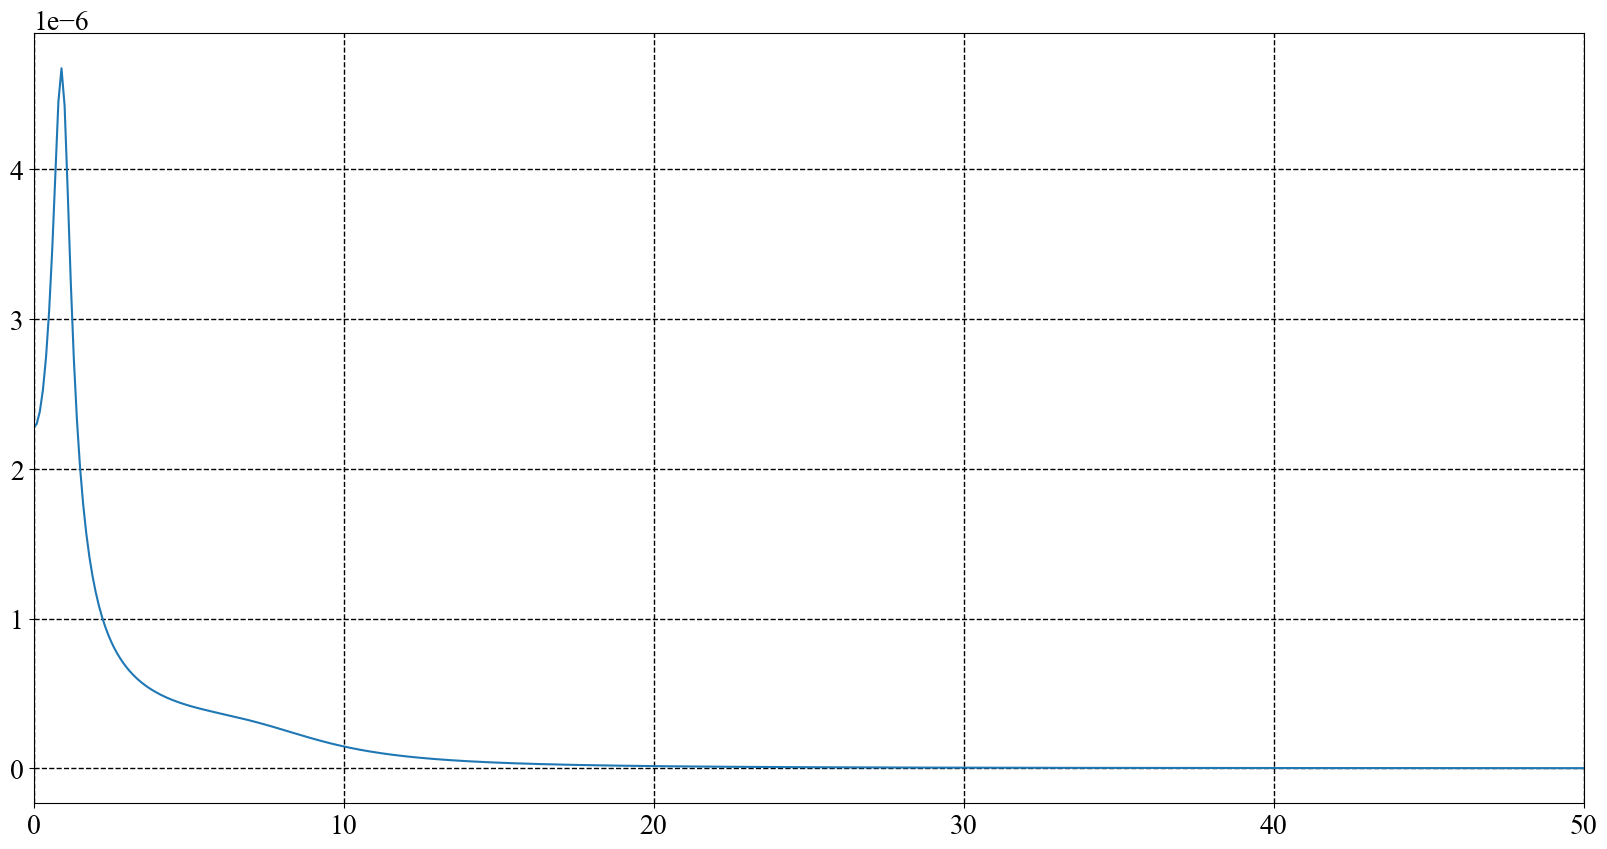

In [44]:
fig,axs = plt.subplots(figsize=(20,10))
sns.lineplot(x=f,y=frf_engine_wheel,ax=axs)
axs.set_xlim([0,50])